In [23]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [26]:
ASSY37WDCB11shank0 = (
(0,0),
(0,40),
(5,80),
(10,120),
(15,160),
(20,200),
(25,240),
(30,280),
(70,20),
(65,60),
(60, 100),
(55, 140),
(50,180),
(45, 220),
(40, 260),
(35,305)
)
ASSY37WDCB11shank0 = [(-x,-y + 305) for (x,y) in ASSY37WDCB11shank0]  #invert, and scale so deepest site is at y=0
shank0_channels = (16,12,8,6,2,3,5,9,15,10,14,13,4,1,7,11)
ASSY37WDCB11shank1 = [(x + 250, y) for (x,y) in ASSY37WDCB11shank0]
shank1_channels = (17,21,22,25,27,29,28,30,18,23,19,20,24,26,31,32)

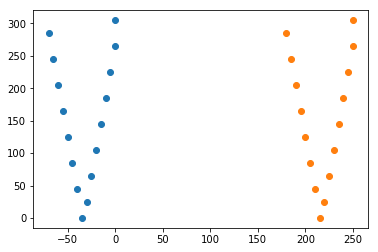

In [27]:
plt.plot([x for (x,y) in ASSY37WDCB11shank0],[y for (x,y) in ASSY37WDCB11shank0],'o')
plt.plot([x for (x,y) in ASSY37WDCB11shank1],[y for (x,y) in ASSY37WDCB11shank1],'o')


# Process adjacencies/geometries
Accounts for the channel mapping between the probe and the intan board.

In [28]:
#produces pairs of probe site adjacencies from the electrode coordinates in physical space through Delauney tesselation,
#subject to a maximum site spacing (in microns) of max_edgelength. 
import numpy as np
import scipy.spatial as spatial

def adjacency_from_geometry(coords, channels, max_edgelength = 40, correspondence = None):
        
    c = np.array(coords)
    tess = spatial.Delaunay(coords)
    indices, indptr = tess.vertex_neighbor_vertices
    adjs = []
    for k in range(indices.shape[0]-1):
        for j in indptr[indices[k]:indices[k+1]]:
            try:
                if(spatial.distance.euclidean(c[k], c[j]) < max_edgelength):
                    adjs.append((channels[k],channels[j]))
            except:
                pass
    return adjs
    

In [29]:
def translate_adjacencies(adjacencies, correspondence=None):
    if correspondence is not None:
        for i,(x,y) in enumerate(adjacencies):
            adjacencies[i] = (translate(x, correspondence), translate(y,correspondence))
    return adjacencies

def translate(val, correspondence):
    return [y for (x,y) in correspondence if x == val][0]

def geometries(channels, geo):
    geometry = {}
    for i,ch in enumerate(channels):
        geometry[ch] = geo[i]
    return geometry

In [30]:
intan = [30, 26, 21, 17, 27, 22, 20, 25, 28, 23, 19, 24, 29, 18, 31, 16, 0, 15, 2, 13, 8, 9, 7, 1, 6, 14, 10, 11, 5, 12, 4, 3]
probe = [i for i in range(1,33)]
cor = list(zip(probe,intan))

In [34]:
shank0_adj = adjacency_from_geometry(ASSY37WDCB11shank0, shank0_channels, 50)
shank1_adj = adjacency_from_geometry(ASSY37WDCB11shank1, shank1_channels, 50)

channel_groups = {}
channel_groups[0] = {}
channel_groups[0]['channels'] = shank0_channels
channel_groups[0]['graph'] = shank0_adj
channel_groups[0]['geometry'] = geometries(shank0_channels, ASSY37WDCB11shank0)
channel_groups[1] = {}
channel_groups[1]['channels'] = shank1_channels
channel_groups[1]['graph'] = shank1_adj
channel_groups[1]['geometry'] = geometries(shank1_channels, ASSY37WDCB11shank1)

channel_groups_intan = {}
channel_groups_intan[0] = {}
channel_groups_intan[0]['channels'] = [translate(ch, cor) for ch in shank0_channels]
channel_groups_intan[0]['graph'] = translate_adjacencies(shank0_adj,cor)
channel_groups_intan[0]['geometry'] = geometries([translate(ch, cor) for ch in shank0_channels], ASSY37WDCB11shank0)
channel_groups_intan[1] = {}
channel_groups_intan[1]['channels'] = [translate(ch, cor) for ch in shank1_channels]
channel_groups_intan[1]['graph'] = translate_adjacencies(shank1_adj,cor)
channel_groups_intan[1]['geometry'] = geometries([translate(ch, cor) for ch in shank1_channels], ASSY37WDCB11shank1)

In [35]:
channel_groups_intan

{0: {'channels': [16,
   24,
   25,
   22,
   26,
   21,
   27,
   28,
   31,
   23,
   18,
   29,
   17,
   30,
   20,
   19],
  'geometry': {16: (0, 305),
   17: (-50, 125),
   18: (-60, 205),
   19: (-35, 0),
   20: (-40, 45),
   21: (-20, 105),
   22: (-10, 185),
   23: (-65, 245),
   24: (0, 265),
   25: (-5, 225),
   26: (-15, 145),
   27: (-25, 65),
   28: (-30, 25),
   29: (-55, 165),
   30: (-45, 85),
   31: (-70, 285)},
  'graph': [(16, 24),
   (24, 16),
   (24, 25),
   (25, 22),
   (25, 24),
   (22, 29),
   (22, 26),
   (22, 25),
   (26, 22),
   (26, 29),
   (26, 17),
   (26, 21),
   (21, 27),
   (21, 30),
   (21, 17),
   (21, 26),
   (27, 20),
   (27, 30),
   (27, 28),
   (27, 21),
   (28, 20),
   (28, 19),
   (28, 27),
   (31, 23),
   (23, 31),
   (23, 18),
   (18, 23),
   (18, 29),
   (29, 22),
   (29, 26),
   (29, 18),
   (29, 17),
   (17, 29),
   (17, 26),
   (17, 30),
   (17, 21),
   (30, 20),
   (30, 17),
   (30, 27),
   (30, 21),
   (20, 30),
   (20, 19),
   (20, 28)

In [33]:
channel_groups

{0: {'channels': (16, 12, 8, 6, 2, 3, 5, 9, 15, 10, 14, 13, 4, 1, 7, 11),
  'geometry': {1: (-45, 85),
   2: (-15, 145),
   3: (-20, 105),
   4: (-50, 125),
   5: (-25, 65),
   6: (-10, 185),
   7: (-40, 45),
   8: (-5, 225),
   9: (-30, 25),
   10: (-65, 245),
   11: (-35, 0),
   12: (0, 265),
   13: (-55, 165),
   14: (-60, 205),
   15: (-70, 285),
   16: (0, 305)},
  'graph': [(16, 24),
   (24, 16),
   (24, 25),
   (25, 22),
   (25, 24),
   (22, 29),
   (22, 26),
   (22, 25),
   (26, 22),
   (26, 29),
   (26, 17),
   (26, 21),
   (21, 27),
   (21, 30),
   (21, 17),
   (21, 26),
   (27, 20),
   (27, 30),
   (27, 28),
   (27, 21),
   (28, 20),
   (28, 19),
   (28, 27),
   (31, 23),
   (23, 31),
   (23, 18),
   (18, 23),
   (18, 29),
   (29, 22),
   (29, 26),
   (29, 18),
   (29, 17),
   (17, 29),
   (17, 26),
   (17, 30),
   (17, 21),
   (30, 20),
   (30, 17),
   (30, 27),
   (30, 21),
   (20, 30),
   (20, 19),
   (20, 28),
   (20, 27),
   (19, 20),
   (19, 28)]},
 1: {'channels': (17